In [1]:
#import libraries
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string

In [2]:
#read the csv file
msg=pd.read_csv('messages.csv')       

In [5]:
#checking unique values
for column in msg.columns:
    print(f"{column}: Number of unique values {msg[column].nunique()}")
    print('*****************************************************************')

subject: Number of unique values 2613
*****************************************************************
message: Number of unique values 2859
*****************************************************************
label: Number of unique values 2
*****************************************************************


In [6]:
msg.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   subject  2831 non-null   object
 1   message  2893 non-null   object
 2   label    2893 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 67.9+ KB


In [7]:
msg.head()

subject  \
0            job posting - apple-iss research center   
1                                                NaN   
2  query : letter frequencies for text identifica...   
3                                               risk   
4                           request book information   

                                             message  label  
0  content - length : 3386 apple-iss research cen...      0  
1  lang classification grimes , joseph e . and ba...      0  
2  i am posting this inquiry for sergei atamas ( ...      0  
3  a colleague and i are researching the differin...      0  
4  earlier this morning i was on the phone with a...      0

In [8]:
#get the number of rows and columns 
msg.shape       

(2893, 3)

In [9]:
#get the columns names
msg.columns  

Index(['subject', 'message', 'label'], dtype='object')

In [10]:
#check for duplicates and remove them
msg.drop_duplicates(inplace=True)     

In [11]:
#show the new shape
msg.shape

(2876, 3)

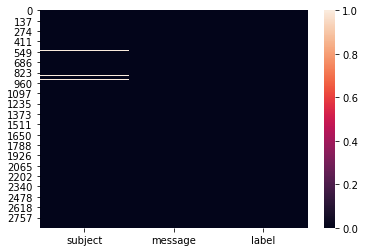

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(msg.isnull())
plt.show()

In [13]:
#show the number of missing data for each column
msg.isnull().sum()       

subject    62
message     0
label       0
dtype: int64

In [14]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='most_frequent')
msg['subject']=imp.fit_transform(msg['subject'].values.reshape(-1,1))

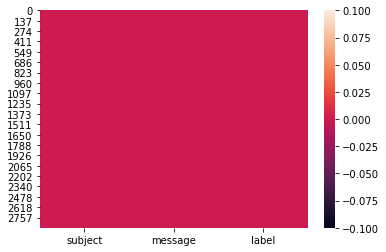

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(msg.isnull())
plt.show()

In [16]:
msg.isnull().sum() 

subject    0
message    0
label      0
dtype: int64

In [17]:
msg.describe()

label
count  2876.000000
mean      0.162726
std       0.369180
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000

In [12]:
df1.isnull().sum()   

subject    0
message    0
label      0
dtype: int64

In [18]:
def process_text(text):
    nopunc=[char for char in text if char not in string.punctuation]
    nopunc= ''.join(nopunc)
    clean_words= [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean_words

In [19]:
#show the tokenization
msg['subject'].head().apply(process_text)

0           [job, posting, appleiss, research, center]
1                                   [sociolinguistics]
2    [query, letter, frequencies, text, identificat...
3                                               [risk]
4                         [request, book, information]
Name: subject, dtype: object

In [20]:
msg['message'].head().apply(process_text)

0    [content, length, 3386, appleiss, research, ce...
1    [lang, classification, grimes, joseph, e, barb...
2    [posting, inquiry, sergei, atamas, satamas, um...
3    [colleague, researching, differing, degrees, r...
4    [earlier, morning, phone, friend, mine, living...
Name: message, dtype: object

In [27]:
#convert a collection of text to a matrix of terms
from sklearn.feature_extraction.text import CountVectorizer
msg_bow = CountVectorizer(analyzer=process_text).fit_transform(msg['message'],msg['subject'])
print(msg_bow)

  (0, 16983)	1
  (0, 35998)	1
  (0, 3183)	1
  (0, 9305)	1
  (0, 50040)	5
  (0, 14541)	3
  (0, 60898)	2
  (0, 454)	1
  (0, 39639)	1
  (0, 33192)	1
  (0, 61480)	1
  (0, 9303)	3
  (0, 16443)	1
  (0, 30961)	1
  (0, 31658)	2
  (0, 56900)	2
  (0, 52278)	2
  (0, 41391)	2
  (0, 60516)	2
  (0, 53806)	4
  (0, 36945)	2
  (0, 37107)	2
  (0, 52828)	1
  (0, 54879)	5
  (0, 52292)	1
  :	:
  (2875, 28899)	1
  (2875, 34511)	1
  (2875, 21523)	1
  (2875, 44845)	1
  (2875, 28769)	1
  (2875, 58062)	1
  (2875, 14385)	2
  (2875, 62289)	2
  (2875, 39340)	1
  (2875, 62073)	1
  (2875, 21647)	1
  (2875, 57227)	1
  (2875, 10227)	1
  (2875, 50042)	1
  (2875, 38297)	1
  (2875, 40242)	2
  (2875, 9838)	1
  (2875, 13870)	1
  (2875, 30651)	1
  (2875, 32993)	1
  (2875, 45674)	1
  (2875, 14936)	1
  (2875, 37052)	1
  (2875, 33112)	2
  (2875, 39397)	2


In [28]:
#get the shape of messages_bow
msg_bow.shape

(2876, 64661)

In [29]:
#split the data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(msg_bow,msg['label'],test_size=0.20, random_state=0)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [32]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier()]
for m in model:
    
    score=cross_val_score(m,msg_bow,msg['label'],cv=5)
    print('score of',m,'is:',score)
    print('Mean score:',score.mean())
    print('Standard deviation:',score.std())
    print('**************************************************************************************')
    print('\n')

score of LogisticRegression() is: [0.98784722 0.9773913  0.98956522 0.98956522 0.98956522]
Mean score: 0.9867868357487921
Standard deviation: 0.004744652641319891
**************************************************************************************


score of DecisionTreeClassifier() is: [0.93229167 0.95130435 0.93913043 0.95130435 0.95652174]
Mean score: 0.9461105072463768
Standard deviation: 0.008966911127533408
**************************************************************************************


score of KNeighborsClassifier() is: [0.94097222 0.92173913 0.92       0.93043478 0.80869565]
Mean score: 0.9043683574879227
Standard deviation: 0.048412105871490106
**************************************************************************************




In [33]:
model=[LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier()]
for m in model:
    x_train,x_test,y_train,y_test=train_test_split(msg_bow,msg['label'],test_size=0.20, random_state=0)
    m.fit(x_train,y_train)
    print('score of',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('score:')
    print('accuracy_score:',accuracy_score(y_test,predm))
    print('confusion_matrix:',confusion_matrix(y_test,predm))
    print('classification_report:',classification_report(y_test,predm))
    print('************************************************************************************************************************************')
    print('\n')

score of LogisticRegression() is: 1.0
score:
accuracy_score: 0.9947916666666666
confusion_matrix: [[493   1]
 [  2  80]]
classification_report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       494
           1       0.99      0.98      0.98        82

    accuracy                           0.99       576
   macro avg       0.99      0.99      0.99       576
weighted avg       0.99      0.99      0.99       576

************************************************************************************************************************************


score of KNeighborsClassifier() is: 0.957391304347826
score:
accuracy_score: 0.9340277777777778
confusion_matrix: [[491   3]
 [ 35  47]]
classification_report:               precision    recall  f1-score   support

           0       0.93      0.99      0.96       494
           1       0.94      0.57      0.71        82

    accuracy                           0.93       576
   macro avg    

In [34]:
import joblib
joblib.dump(LogisticRegression,'msg.pkl')

['msg.pkl']